<a href="https://colab.research.google.com/github/xhroch01/MPA-MLF/blob/main/LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans



**0. Load dataset**

In [47]:
from google.colab import files
uploaded = files.upload()

Saving k_mean_points.npy to k_mean_points (1).npy


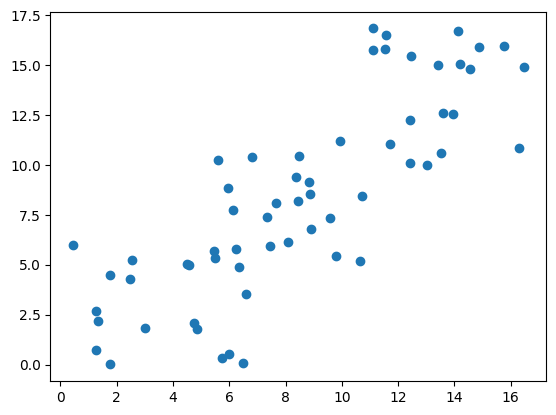

In [48]:
loaded_points = np.load('k_mean_points.npy')

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])

**1. Specify number of clusters K**

In [49]:
k = 3

**2. initialize centroids**

There are more techniques, on how to change initial centroids. In out case, we will take all available points and shuffle them randomly, then we will choose first k_clusters points as initial centroids

In [50]:
def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type: points ndarray with shape (n, 2)

    :param k_clusters: The number of clusters to form
    :type k_clusters: int


    :return: initial_clusters
    initial_clusters: Array of initialized centroids

    :rtype:
    initial_clusters: np.array (k_clusters, 2)
    :

    """

    ###################################
    # Write your own code here #

    row_indexes = np.random.choice(points.shape[0], size=k_clusters, replace=False)
    initial_clusters = points[row_indexes,:]

    ###################################

    return initial_clusters

In [51]:
init_clusters = initialize_clusters(loaded_points, k)
print(init_clusters)

[[ 6.57977375  3.55640765]
 [13.04128739 10.02107654]
 [ 7.43786942  5.92059597]]


**3. Calculate distance from centroids to all points in datasets**

3.1 Fistly, create a function to calculate distance from one centroid to all points in the dataset

In [52]:
def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    """
    Calculates the distance metric between each point and a given centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroid: A single centroid
    :type centroid: ndarray with shape (1, 2)

    :return: distances_array
    distances_array: Array of distances from point to centroid

    :rtype:
    distances_array: ndarray with shape (n,)
    :
    """

    ###################################
    # Write your own code here #

    # distances_array = np.square(norm(points - centroid, axis=1))
    distances_array = (norm(points - centroid, axis=1))

    ###################################

    return distances_array

In [53]:
print(loaded_points)
metrics=calculate_metric(loaded_points, init_clusters[1])

[[4.85118811e+00 1.78914034e+00]
 [6.57977375e+00 3.55640765e+00]
 [5.46249345e+00 5.69923549e+00]
 [5.48468640e+00 5.34031980e+00]
 [6.34312913e+00 4.88965840e+00]
 [4.53674641e-01 5.98985979e+00]
 [4.73961567e+00 2.10435052e+00]
 [4.50247638e+00 5.03258765e+00]
 [2.53970335e+00 5.26471704e+00]
 [1.27517936e+00 7.21528315e-01]
 [1.77123907e+00 8.95721197e-03]
 [5.73224268e+00 3.48706783e-01]
 [3.00786776e+00 1.85993730e+00]
 [6.49968785e+00 1.06601479e-01]
 [1.27666944e+00 2.69614780e+00]
 [1.34156806e+00 2.18795613e+00]
 [2.46318131e+00 4.31101006e+00]
 [1.76717956e+00 4.49617009e+00]
 [6.00496171e+00 5.58578050e-01]
 [4.55508778e+00 4.99697372e+00]
 [8.38223854e+00 9.39009357e+00]
 [7.35303759e+00 7.37369046e+00]
 [6.81116690e+00 1.04018792e+01]
 [5.60854498e+00 1.02620318e+01]
 [9.58603089e+00 7.36472467e+00]
 [8.83088345e+00 9.17169381e+00]
 [6.14700838e+00 7.74303618e+00]
 [1.07252941e+01 8.44486038e+00]
 [7.66355388e+00 8.09644192e+00]
 [8.42711609e+00 8.19761435e+00]
 [1.063519

3.2 Secondly, create a function to calculate distance between points and all centroids using function from 3.1

In [71]:
def compute_distances(points: np.array, centroids_points: np.array) -> np.array:
    """
    Computes and returns the distance from each point to each centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroids_points: A all centroid points
    :type centroids_points: ndarray with shape (k_clusters, 2)


    :return: distances_array
    distances_array: 2D array with distances of each point to each centroid.

    :rtype:
    distances_array: ndarray of shape (k_clusters, n)
    """
    ###################################
    # Write your own code here #

    distance_list = []
    for centroid in centroids_points:
        distances = calculate_metric(points, centroid)
        distance_list.append(distances)

    distances_array = np.asarray(distance_list)
    ###################################

    return distances_array

In [72]:
dis_array = compute_distances(loaded_points, init_clusters)
print(dis_array)

[[ 2.47209265  0.          2.41661467  2.09321735  1.35408946  6.59172054
   2.34406733  2.54838612  4.38639828  6.01458748  5.97548411  3.31777844
   3.95430449  3.45073562  5.37242612  5.41400577  4.18518317  4.90349022
   3.0524402   2.48487101  6.10579812  3.89481514  6.84938128  6.77559447
   4.85189247  6.04970525  4.20893625  6.40954828  4.66760009  4.99534517
   4.37319695  8.35191306  3.71625746  2.27256166  2.51509733  3.97118786
   5.34595279  7.16897105  5.47882027  3.00224913 13.89814844 15.05633118
  13.27077239 13.33183725 11.43220298 15.17923816 11.62454303 10.48356024
   9.87843346  8.77205303  9.14019159 13.78694664 13.78294664 13.0030484
  12.15599145 13.24799728 14.88127236 15.44699816 14.04013371  9.079992  ]
 [11.61217033  9.14019159  8.72447292  8.88885269  8.43781821 13.2173637
  11.47136889  9.88920193 11.52849613 14.99742962 15.07502977 12.1234018
  12.93343353 11.87810339 13.85860082 14.07981562 12.02086467 12.55508258
  11.79189368  9.86190615  4.70158226  6

**4. Assign datapoints to the closest centroids**

In [74]:
def assign_centroids(distances: np.array) -> np.array:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_clusters
    assigned_clusters: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """

    ###################################
    # Write your own code here #

    assigned_centroids = np.argmin(distances, axis=0)
    ###################################

    return assigned_centroids

In [75]:
assigned_centroid = assign_centroids(dis_array)
print(assigned_centroid)

[0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2
 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**5. Calculate objective function**

In [76]:
def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.ndarray:
    """
    Calculates and returns the objective function value for the clustering.

    Parameters:
    :param assigned_centroids: Array indicating the cluster assignment for each point.
    :type assigned_centroids: ndarray with shape (1, n) and and dtype = np.int64

    :param distances: 2D array with distances of each point to each centroid
    :type distances: ndarray with shape (k_clusters, n) and and dtype = np.float64

    :return: onjective_function_value
    onjective_function_value: Objective function value.

    :rtype:
    onjective_function_value: float32


    """
    ###################################
    # Write your own code here #
    objective_function_value = 0
    for i in range(60-1):
      if assigned_centroids[i] == 0:
        objective_function_value = objective_function_value + distances[0, i]
      if assigned_centroids[i] == 1:
        objective_function_value = objective_function_value + distances[1, i]
      if assigned_centroids[i] == 2:
        objective_function_value = objective_function_value + distances[2, i]

    ###################################

    return objective_function_value

In [77]:
obj_fcn_value = calculate_objective(assigned_centroid, dis_array)
print(obj_fcn_value)

209.73073432830267


6. Compute new controids to the clusters by taking the average of the all data points that belong to each cluster

In [78]:
def calculate_new_centroids(points: np.array, assigned_centroids: np.array, k_clusters: int) -> np.array:
    """
    Computes new centroids based on the current cluster assignments.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param assigned_centroids: Array indicating the closest centroid for each data point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int32


    :param k_clusters: Number of clusters.
    :type k_clusters: int


    :return: new_clusters
    new_clusters: new cluster points

    :rtype:
    new_clusters: ndarray with shape (1, n) and dtype = np.float32
    """

    ###################################
    # Write your own code here #


    new_centroids = []
    for cluster in range(k_clusters):
      ind = np.where(assigned_centroids == cluster)
      new_centroids.append(np.mean(points[ind], axis=0))

    new_clusters = np.asarray(new_centroids)


    ###################################

    return new_clusters

In [79]:
new_clusters = calculate_new_centroids(loaded_points, assigned_centroid, k)
print(new_clusters)

[[ 3.65024587  2.82884935]
 [12.92447019 13.4316236 ]
 [ 7.66663744  7.45852385]]


**7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached**

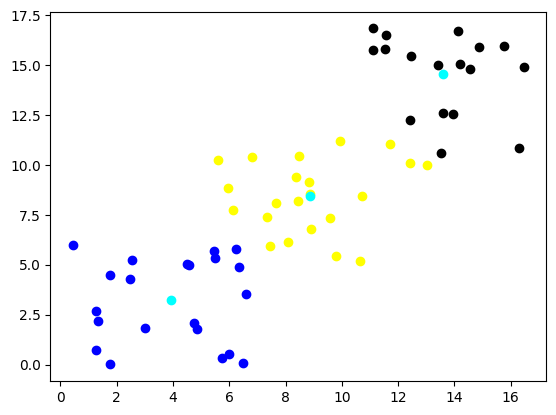

In [82]:
def fit(points: np.array, k_clusters: int, n_of_oterations: int, error: float = 0.001) -> tuple:
    """
    Fits the k-means clustering model on the dataset.

    Parameters:
    :param points : Array of data points.
    :type points: ndarray with shape (n, 2) and dtype = np.float32

    :param k_clusters:  Number of clusters
    :type k_clusters: int

    :param n_of_oterations:  Maximum number of iterations
    :type n_of_oterations: int


    :param error: Threshold for convergence.
    :type error: float

    :return: centroid_points, last_objective
    centroid_points: final centroid points
    last_objective: final objective funtion

    :rtype:
    centroid_points: ndarray with shape (k_clusters, 2) and dtype = np.float32
    last_objective: float

    """

    ###################################
    # Write your own code here #

    centroid_points = np.array([])
    last_objective = 10000.0
    centroid_points = initialize_clusters(points, k_clusters)

    for _ in range(n_of_oterations):
        distances = compute_distances(points, centroid_points)
        centroid_sel = assign_centroids(distances)
        last_objective = calculate_objective(assigned_centroid, distances)
        centroid_points = calculate_new_centroids(points, centroid_sel, k)
        if last_objective < error:
            pass

    ###################################
    counter = 0
    for i in centroid_sel:
        if(i==0):
          plt.scatter(points[counter,0],points[counter,1],color='black')
        if(i==1):
          plt.scatter(points[counter,0],points[counter,1],color='blue')
        if(i==2):
          plt.scatter(points[counter,0],points[counter,1],color='yellow')
        counter=counter+1
    plt.scatter(centroid_points[:,0],centroid_points[:,1],color='cyan')

    return centroid_points, last_objective

out,obj=fit(loaded_points,k,10000)

Exercise 2 - Implementing an Elbow Method
Implementing an elbow method is simple,

Create a vector of possible k values
Fit your data using different k values and save the objective function value
Plot objective function values in terms of k values
Find an elbow

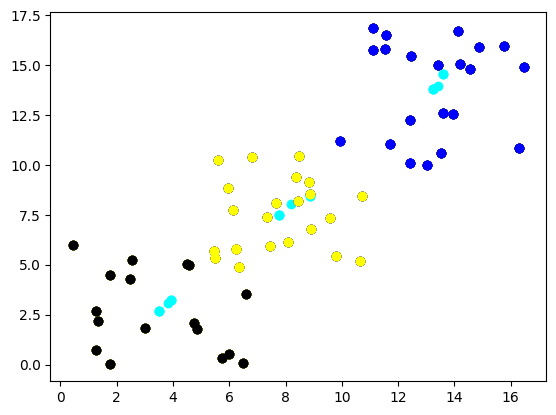

In [86]:
k_all = range(2, 10)
all_objective = []

#WRITE YOUR CODE HERE
n = 1000

for i in k_all:
    _, obj = fit(loaded_points, k, n)
    all_objective.append(obj)


Text(0, 0.5, 'Sum of squared distance')

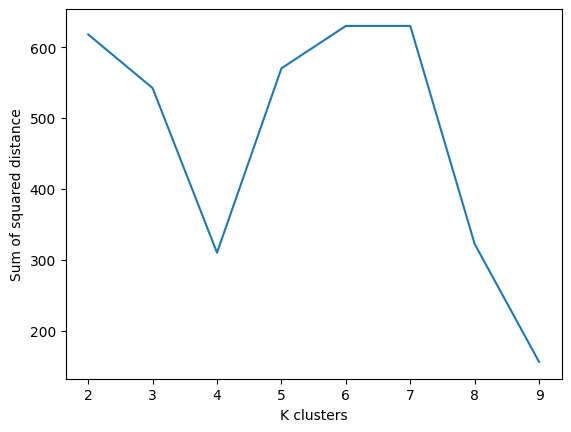

In [84]:
plt.figure()
plt.plot(k_all, all_objective)
plt.xlabel('K clusters')
plt.ylabel('Sum of squared distance')

Exercise 3 - Image Compression

In [87]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np

1. load image

In [91]:
from google.colab import files
uploaded = files.upload()


Saving fish.jpg to fish (3).jpg


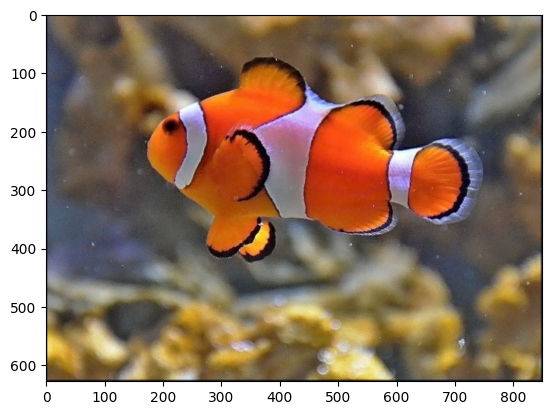

In [93]:
loaded_image = imread('fish.jpg')
plt.imshow(loaded_image)
plt.show()

In [94]:
def compress_image(image: np.array, number_of_colours: int) -> np.array:
    """
    Compresses the given image by reducing the number of colours used in the image.

    This function applies k-means clustering to group the pixel colours of the image
    into 'number_of_colours' clusters. Each pixel's colour in the image is then replaced
    with the colour of the closest centroid of these clusters. This process effectively
    reduces the number of colours in the image, resulting in compression.

    Parameters:
    image (np.array): The original image is represented as a 3D numpy array
                      (height x width x color_channels).
    number_of_colours (int): The number of colours to reduce the image to.

    Returns:
    np.array: The compressed image as a numpy array in the same shape as the input.
    """
    shape = image.shape
    reshaped = np.reshape(image, (image.shape[0]*image.shape[1],image.shape[2]))
    kmeans = KMeans(n_clusters=number_of_colours, random_state=0).fit(reshaped)
    labels = kmeans.labels_
    colors = kmeans.cluster_centers_.astype('uint8')
    image = colors[labels].reshape(shape)

    return image

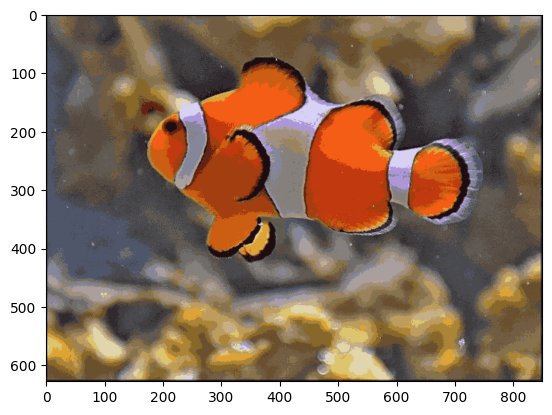

In [95]:
img = compress_image(loaded_image, 30)

plt.figure()
plt.imshow(img)
plt.show()